
# Experiment: Fit N Prev Trial Not Started (scaled)

**Goal**: Determine if knowing the number of previous trials not started (i.e. more than binary encoding) predicts L/R/V trials. This feature is scaled between 0 and 1.

Because this value is often so small the scaling crates an effect where the weight for the reressor is huge- I don't think this is the correct approach and in the next notebook I will try it unscaled.


Related notebooks:

* `2024_02_20_dev_trial_not_started.ipynb`
* `2024_02_20_EXP_fit_prev_trial_not_started.ipynb`

## Imports

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment
from multiglm.experiments.experiment_sigma_sweep import ExperimentSigmaSweep
from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression
from multiglm.visualizations.model_visualizer import ModelVisualizer
from multiglm.features.design_matrix_generator import DesignMatrixGeneratorFilteredHistory
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model Configs

In [14]:
model_config = {
    "prev_trial_not_started": {
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {
            "prev_violation": 1
        },  # filter column with animals tau,
        "design_matrix_generator_args": {
            "trial_not_started": "scaled_n_prev",
        },
    }
}

params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": ["prev_violation"],
    "model_config": model_config,
}

save_name = "2024_02_20_fit_n_prev_trial_not_started_scaled.pkl"

## Run

In [7]:
experiment = ExperimentSigmaSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']

 >>>> evaluating animal W051 <<<<
Evaluating trial_not_started scaled_n_prev

 ***** evaluating model prev_trial_not_started w/ sigma 0.07 *****
Optimization terminated successfully.
         Current function value: 64772.309430
         Iterations: 30
         Function evaluations: 42
         Gradient evaluations: 42

 ***** evaluating model prev_trial_not_started w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 64482.008417
         Iterations: 30
         Function evaluations: 42
         Gradient evaluations: 42

 ***** evaluating model prev_trial_not_started w/ sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 64387.396990
         Iterations: 29
         Function evaluations: 39
         Gradient eval

## Visualize

In [8]:
experiment = load_experiment(save_name)
palette = "Set2"
mv = ModelVisualizer(experiment)

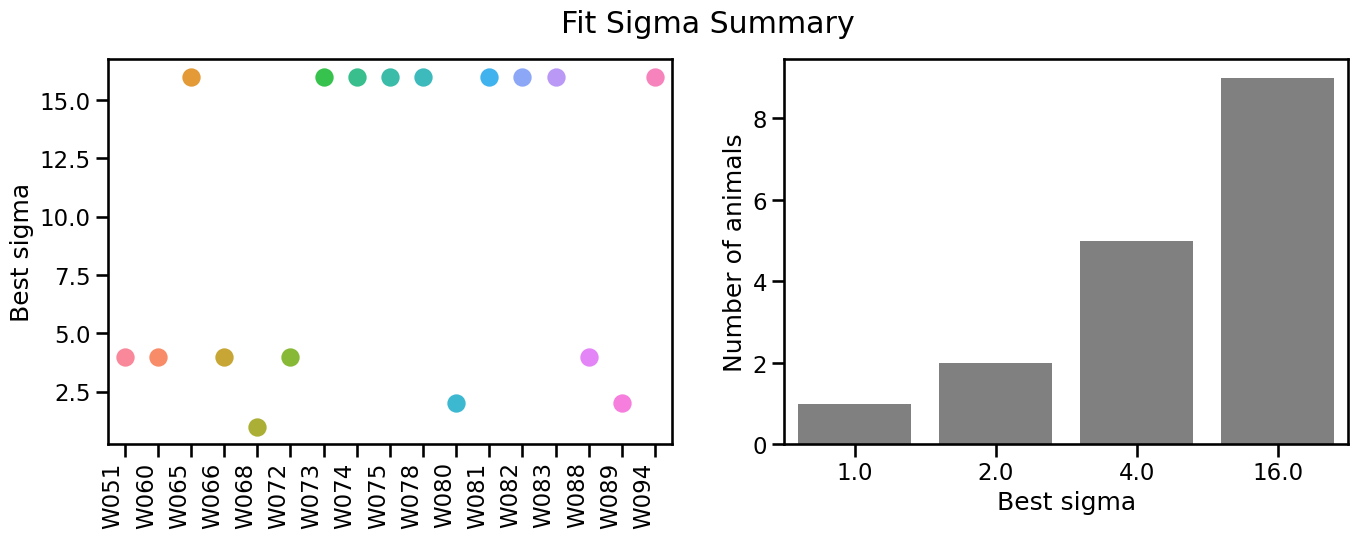

In [9]:
mv.plot_sigma_summary()

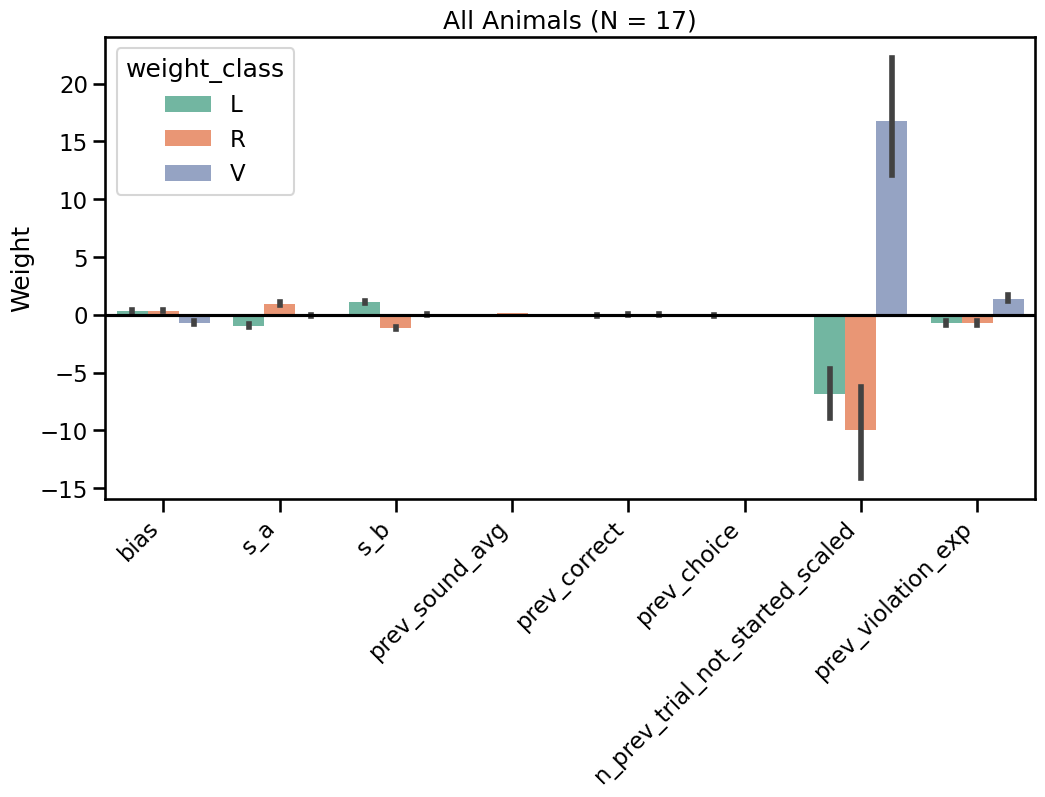

In [10]:
mv.plot_weights_summary(palette=palette)

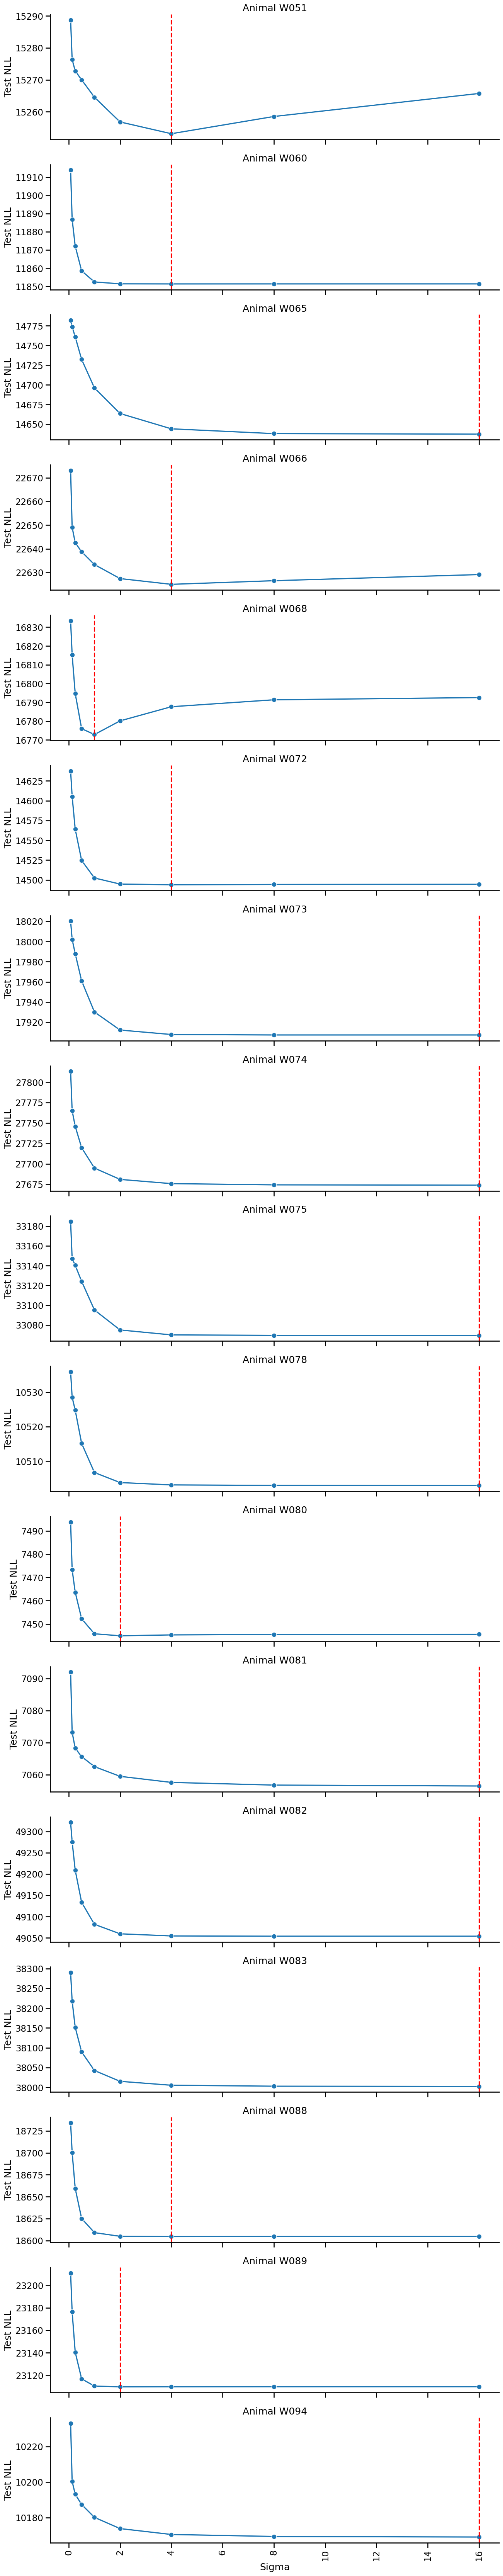

In [11]:
mv.plot_nll_over_sigmas_by_animal()

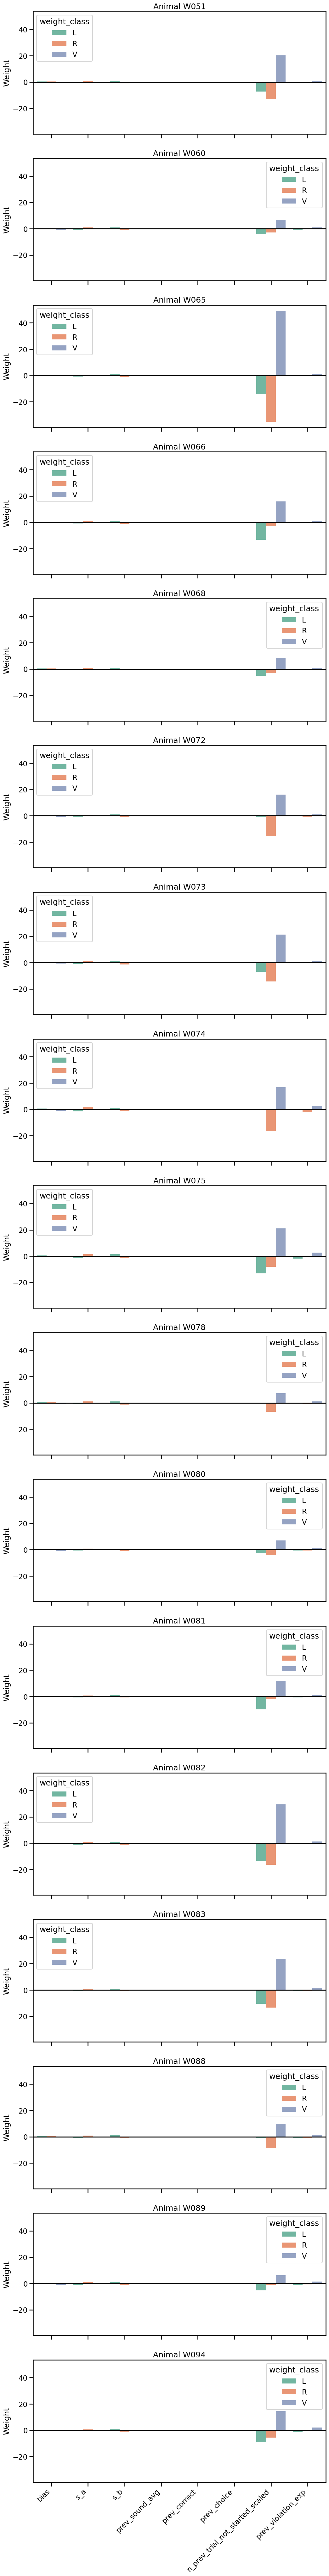

In [12]:
mv.plot_weights_by_animal(palette=palette)